In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the training and testing datasets from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features (pixel values) and labels
x_train = train_data.iloc[:, 1:].values  # All columns except the first (labels)
y_train = train_data.iloc[:, 0].values   # First column is the label
x_test = test_data.iloc[:, 1:].values    # All columns except the first (labels)
y_test = test_data.iloc[:, 0].values     # First column is the label

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data to fit the model (flattened 28x28 images)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [2]:
# Define the baseline model
def create_baseline_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
baseline_model = create_baseline_model()
baseline_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
baseline_history = baseline_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7964 - loss: 0.7044 - val_accuracy: 0.9496 - val_loss: 0.1753
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9515 - loss: 0.1637 - val_accuracy: 0.9663 - val_loss: 0.1241
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9681 - loss: 0.1068 - val_accuracy: 0.9689 - val_loss: 0.1090
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9767 - loss: 0.0775 - val_accuracy: 0.9695 - val_loss: 0.0998
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9827 - loss: 0.0606 - val_accuracy: 0.9739 - val_loss: 0.0873
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9705 - val_loss: 0.1001
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9901 - loss: 0.0352 - val_accuracy: 0.9747 - val_loss: 0.0871
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.

In [3]:
# Define the model with L1 regularization
def create_l1_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l1'),
        layers.Dense(64, activation='relu', kernel_regularizer='l1'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l1_model = create_l1_model()
l1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
l1_history = l1_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6163 - loss: 15.4701 - val_accuracy: 0.8144 - val_loss: 1.5563
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8119 - loss: 1.5073 - val_accuracy: 0.8418 - val_loss: 1.3356
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8370 - loss: 1.3232 - val_accuracy: 0.8550 - val_loss: 1.2324
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8515 - loss: 1.2465 - val_accuracy: 0.8641 - val_loss: 1.1746
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8571 - loss: 1.1948 - val_accuracy: 0.8615 - val_loss: 1.1518
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8627 - loss: 1.1506 - val_accuracy: 0.8729 - val_loss: 1.1061
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8682 - loss: 1.1227 - val_accuracy: 0.8705 - val_loss: 1.0973
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8684 - loss: 1.0990 - val_accura

In [4]:
# Define the model with L2 regularization
def create_l2_model():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,), kernel_regularizer='l2'),
        layers.Dense(64, activation='relu', kernel_regularizer='l2'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile the model
l2_model = create_l2_model()
l2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
l2_history = l2_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7974 - loss: 2.1058 - val_accuracy: 0.9168 - val_loss: 0.6577
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9133 - loss: 0.6329 - val_accuracy: 0.9285 - val_loss: 0.5222
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9258 - loss: 0.5307 - val_accuracy: 0.9355 - val_loss: 0.4782
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9278 - loss: 0.4932 - val_accuracy: 0.9411 - val_loss: 0.4432
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9344 - loss: 0.4592 - val_accuracy: 0.9437 - val_loss: 0.4259
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9376 - loss: 0.4363 - val_accuracy: 0.9473 - val_loss: 0.4060
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9442 - loss: 0.4106 - val_accuracy: 0.9448 - val_loss: 0.4041
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9446 - loss: 0.4001 - val_accuracy: 0

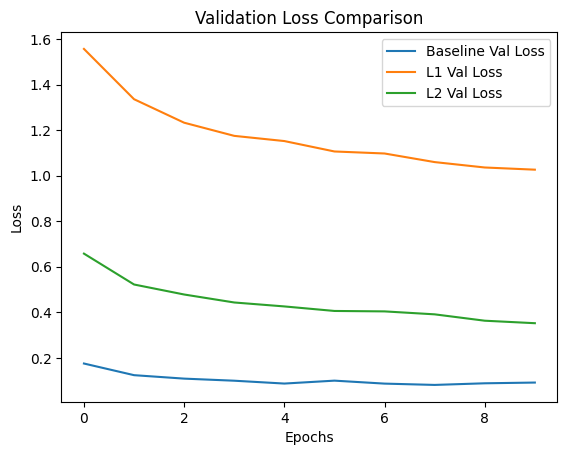

In [5]:
import matplotlib.pyplot as plt

# Plot the training and validation loss for each model
plt.plot(baseline_history.history['val_loss'], label='Baseline Val Loss')
plt.plot(l1_history.history['val_loss'], label='L1 Val Loss')
plt.plot(l2_history.history['val_loss'], label='L2 Val Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

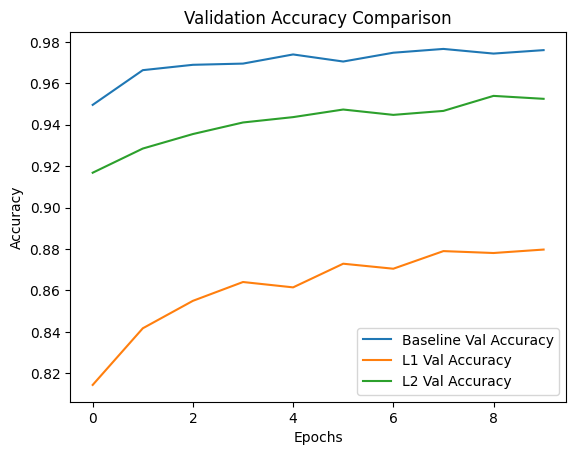

In [6]:
# Plot the training and validation accuracy for each model
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(l1_history.history['val_accuracy'], label='L1 Val Accuracy')
plt.plot(l2_history.history['val_accuracy'], label='L2 Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

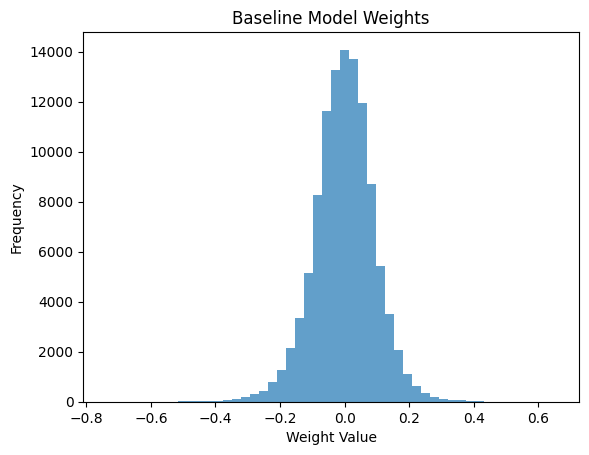

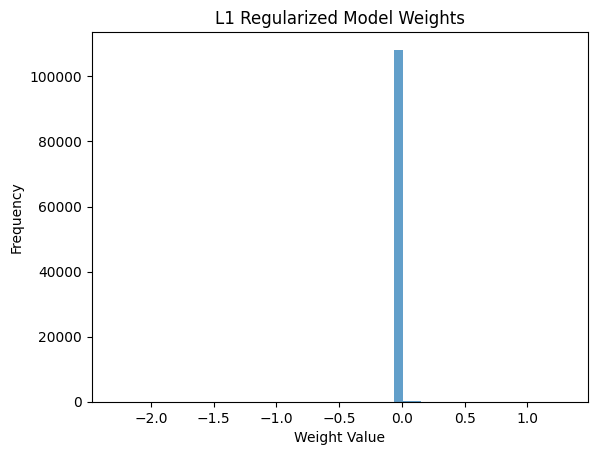

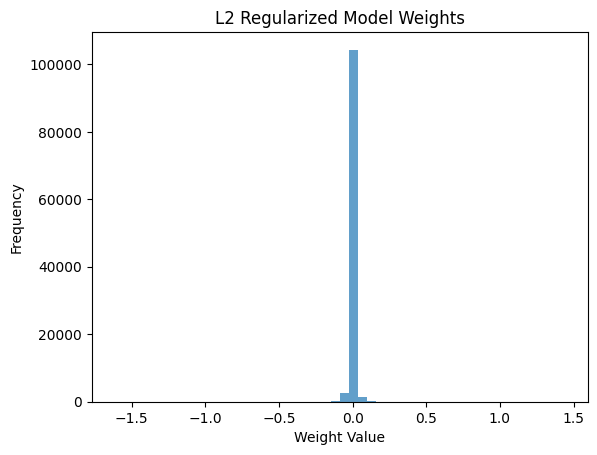

In [7]:
# Function to plot weight distributions
def plot_weight_distribution(model, title):
    weights = []
    for layer in model.layers:
        if isinstance(layer, layers.Dense):
            weights.extend(layer.get_weights()[0].flatten())
    plt.hist(weights, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot weight distributions
plot_weight_distribution(baseline_model, 'Baseline Model Weights')
plot_weight_distribution(l1_model, 'L1 Regularized Model Weights')
plot_weight_distribution(l2_model, 'L2 Regularized Model Weights')